<a href="https://colab.research.google.com/github/ajgquional/LiL_Hands-On-PyTorch-ML/blob/main/01_04_Dataset_Exploration_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import needed libraries
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# create training dataset
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# create testing dataset 
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [ ]:
# create a validate sample from the training dataset
indices = list(range(len(training_data)))
np.random.shuffle(indices)
split = int(np.floor(0.2 * len(training_data)))
train_sample = SubsetRandomSampler(indices[:split])
validate_sample = SubsetRandomSampler(indices[split:])

In [ ]:
# data loader
trainloader = torch.utils.data.DataLoader(training_data, sampler=train_sample, batch_size=64)
validloader = torch.utils.data.DataLoader(training_data, sampler=validate_sample, batch_size=64)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle = True)

In [ ]:
# create a data iterator
%matplotlib inline
dataiter = iter(trainloader)
print(dataiter)
#images,labels = dataiter.next() # in the original exercise file; doesn't work
images,labels = next(dataiter) # source: https://stackoverflow.com/questions/74289077/attributeerror-multiprocessingdataloaderiter-object-has-no-attribute-next

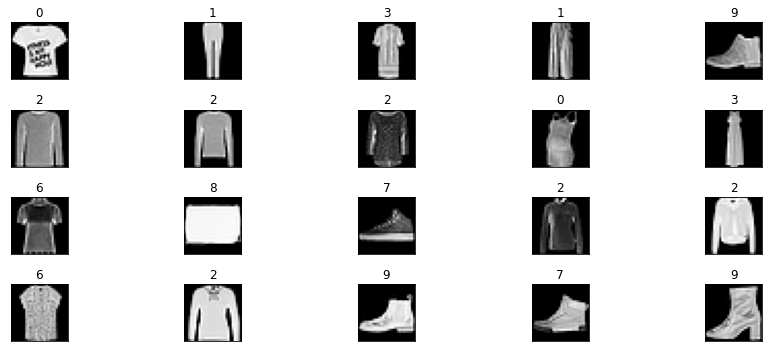

In [ ]:
# plot the data
fig = plt.figure(figsize=(15,5))
for i in np.arange(20):
    ax = fig.add_subplot(4, int(20/4), i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[i]), cmap='gray')
    ax.set_title(labels[i].item())
    fig.tight_layout()